In [1]:
# Notebook imports and packages
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

np.set_printoptions(linewidth=400)
%matplotlib inline

In [3]:
x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).T
y = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).T

def mse(thetas):
    y_hat = thetas[0]+thetas[1]*x
    return np.average(np.power(y-y_hat,2), axis=0)

def grad(x, y, thetas):
    y_hat = thetas[0]+thetas[1]*x
    th0 = -2 * np.average((y-y_hat), axis=0)
    th1 = -2 * np.average((y-y_hat)*x, axis=0)
    return np.array([th0[0],th1[0]])

In [33]:
multiplier = 0.001
thetas = np.array([2.99, 2.99])

plot_vals = thetas.reshape(1,2)
mse_vals = mse(thetas)

for i in range(15000):
    thetas = thetas - multiplier * grad(x, y, thetas)
    
    plot_vals = np.vstack((plot_vals, thetas))
    mse_vals = np.vstack((mse_vals, mse(thetas)))

print(
    thetas,
    mse(thetas)
)

[0.84789464 1.22264854] [0.94796561]


In [12]:
nr_thetas = 1001
th_0 = th_1 = np.linspace(start=0, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        plot_cost[i][j] = mse([plot_t0[i][j], plot_t1[i][j]])

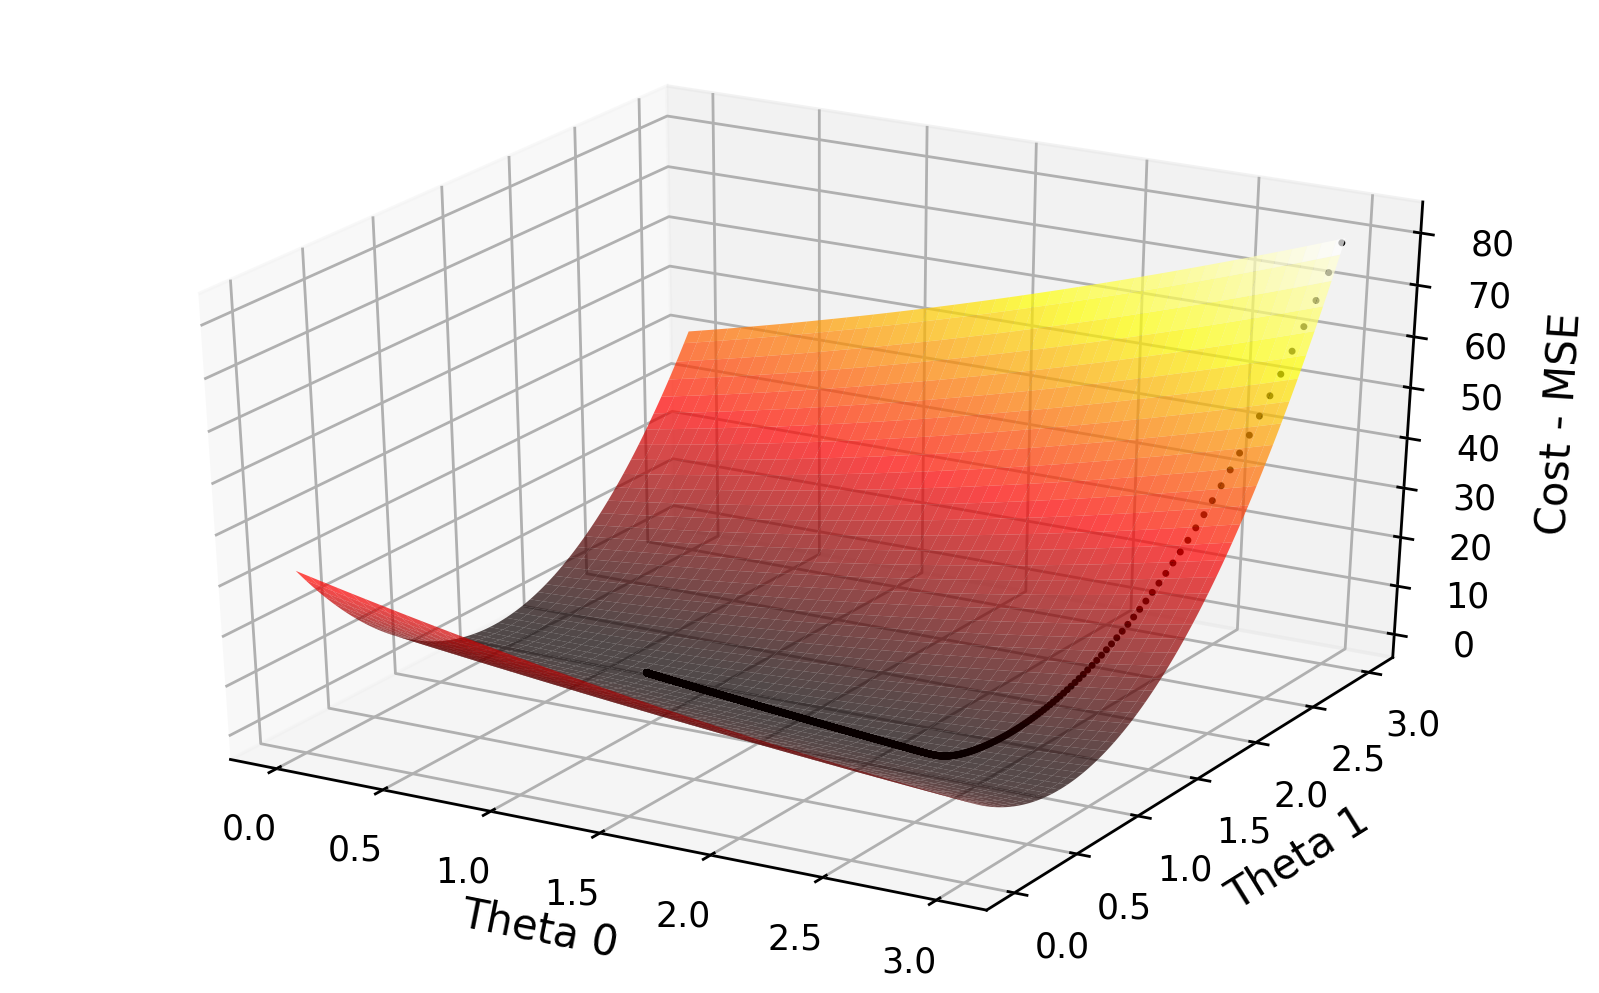

In [39]:
fig = plt.figure(figsize=[8, 5], dpi=250)
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=12)
ax.set_ylabel('Theta 1', fontsize=12)
ax.set_zlabel('Cost - MSE', fontsize=12)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha=.7)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, alpha=1, s=1, color="black")

plt.show()